In [11]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

### Part 1: Using Regularization and Cross Validation to Avoid Overfitting

Below, we split the NBA data into a training and a test set.

In [13]:
np.random.seed(5)
df = pd.read_csv("nba.csv").sample(frac = 1)
df["WON"] = df["WL"]
df["WON"] = df["WON"].replace("W", 1)
df["WON"] = df["WON"].replace("L", 0)
df_train, df_test = np.split(df, [2000])

#### P1A: Training an Unregularized Model

Let's use all of the numerical features available to us. These are given in `p1_features` below.

In [14]:
p1_features = ['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 
               'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 
               'BLK', 'TOV', 'PF', 'PTS']

Below, train an unregularized LogisticRegression model called `unregularized_model`. Your model should try to predict `df_train["WON"]` from the features in `p1_features`.

Make sure to set `penalty = 'none'`. Also, don't use `PolynomialFeatures`.

In [15]:
unregularized_model = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', LogisticRegression(max_iter = 10000, penalty = 'none'))
])  
unregularized_model.fit(df_train[p1_features], df_train["WON"])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Below, we compute the accuracy of your classifier on the training and test set using sklearn's built-in `accuracy_score`. You should get around 84% for the training accuracy and around 83% for the test accuracy.

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(df_train["WON"], unregularized_model.predict(df_train[p1_features]))

0.845

In [17]:
accuracy_score(df_test["WON"], unregularized_model.predict(df_test[p1_features]))

0.8304347826086956

#### P1B: Computing the Cross Entropy Loss

Above, we gave the accuracy for your model. Below, compute the average cross-entropy loss on the training and test sets. 

Hint: You'll need to import `log_loss`. 

Hint: `log_loss` needs probabilities, not classes, so makes ure to use `predict_proba` instead of `predict`.

You should get around 0.34 for the training set and 0.355 for the test set.

In [18]:
from sklearn.metrics import log_loss

In [19]:
log_loss(df_train["WON"], unregularized_model.predict_proba(df_train[p1_features]))

0.33871656339696254

In [20]:
log_loss(df_test["WON"], unregularized_model.predict_proba(df_test[p1_features]))

0.356566085360993

**Important note:** The `.fit` method in `LogisticRegression` picks parameters that minimize the log loss. It does not directly consider entropy.

We will see in optional problem 2 that sometimes these two ideas are in conflict.

#### P1C: Training a Degree 3 Unregularized Model

Below, train a model called `unregularized_poly3_model` that is exactly like your model from part 1A, except that it uses `PolynomialFeatures` with degree 3.

In [21]:
unregularized_poly3_model = Pipeline([        
    ('scale', StandardScaler()),   
    ('poly', PolynomialFeatures(degree = 3)),
    ('model', LogisticRegression(max_iter = 10000, penalty = 'none'))
])  
unregularized_poly3_model.fit(df_train[p1_features], df_train["WON"])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Now compute the accuracy of your model on the training and test sets. You should get 100% accuracy training set, and around 73% on your test set.

In [22]:
accuracy_score(df_train["WON"], unregularized_poly3_model.predict(df_train[p1_features]))

1.0

In [23]:
accuracy_score(df_test["WON"], unregularized_poly3_model.predict(df_test[p1_features]))

0.7326086956521739

We are clearly overfitting here.

#### P1D: Regularized Model with Hard-Coded C

One way to avoid overfitting is to regularize our model. Below, train a model `C1000_poly3_model` that appleis regularization with C1000. Recall, to enable regularization, simply delete `penalty = 'none'`.

In [24]:
C1000_poly3_model = Pipeline([        
    ('scale', StandardScaler()),   
    ('poly', PolynomialFeatures(degree = 3)),
    ('model', LogisticRegression(max_iter = 10000, C = 1000))
])  
C1000_poly3_model.fit(df_train[p1_features], df_train["WON"])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegression(C=1000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Give the accuracy on the training and test set below. You should see that the accuracy score is still 100% for the training set, but the test set accuracy is somewhat better at around 75.5%.

In [25]:
accuracy_score(df_train["WON"], C1000_poly3_model.predict(df_train[p1_features]))

1.0

In [26]:
accuracy_score(df_test["WON"], C1000_poly3_model.predict(df_test[p1_features]))

0.7565217391304347

#### P1E: Using Cross Validation

Above, we selected an arbitrary C. Perhaps some other C would work better. There are two ways to find a better C:

#1. Find the C that works best on a validation set.
#2. Use cross validation.

In this case, we have not kept any data aside as a validation set, so we can't do #1. So let's do #2 instead.

Below train a LogisticRegressionCV model called `cv_poly3_model`, and test C values between 10^-7 and 10^5. For example, you might specify `Cs = 10**np.linspace(-7, 5, 100)`. Set `cv = 3` so that you have 3-fold cross validation.

This might take a while to run.

In [27]:
cv_poly3_model = Pipeline([        
    ('scale', StandardScaler()),   
    ('poly', PolynomialFeatures(degree = 3)),
    ('model', LogisticRegressionCV(max_iter = 10000, Cs = 10**np.linspace(-7, 5, 100), cv = 3))
])  
cv_poly3_model.fit(df_train[p1_features], df_train["WON"])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegressionCV(Cs=array([1.00000000e-07, 1.32194115e-07, 1.74752840e-07, 2.31012970e-07,
       3.05385551e-07, 4.03701726e-07, 5.33669923e-07, 7.05480231e-07,
       9.326033...
       1.41747416e+04, 1.87381742e+04, 2.47707636e+04, 3.27454916e+04,
       4.32876128e+04, 5.72236766e+04, 7.56463328e+04, 1.00000000e+05]),
                                      class_weight=None, cv=3, dual=False,
                                      fit_intercept=True, intercept_scaling=1.0,
                                      l1_ratios=None, max_iter=10000,
                                      multi_class='auto', n_jobs=None,
                                      penalt

We can see what `C` our model picked using cross validation by looking at:

In [28]:
cv_poly3_model.named_steps["model"].C_

array([0.00024771])

Below, compute the training and test set accuracy for `cv_poly3_model`. On my computer, I got 85% on the training set, and 81% on the test set.

We can see that while our model does not perform as well on the training set, it generalizes much better to our unseen test set than our original model `unregularized_poly3_model`, which only was able to achieve 73% accuracy.

**Bottom line:** `cv_poly3_model` does the best job, and it is able to do this by applying regularization, with hyperparameter C selected through cross validation.

In [29]:
accuracy_score(df_train["WON"], cv_poly3_model.predict(df_train[p1_features]))

0.8505

In [30]:
accuracy_score(df_test["WON"], cv_poly3_model.predict(df_test[p1_features]))

0.808695652173913

#### Bonus Problem 1F: L1 Regularization (OPTIONAL)

Just like linear regression, we can also use L1 regularization. That is, instead of adding a penalty term that looks like $\sum \theta_i^2$, it looks like $\sum |\theta_i|$.

In HW4, bonus problem 2H, we explored this. Create a model `p1e_model` below that is just like `cv_poly3_model`, except that it uses L1 regularization. The result is that most parameters will be zero.

To use L1 regularization, set `penalty = l1` and set `solver = 'liblinear'`. 

This might several minutes to finish running, depending on your computer. Consider reducing the number of Cs if you don't want to wait that long.

In [33]:
p1f_model = Pipeline([        
    ('scale', StandardScaler()),   
    ('poly', PolynomialFeatures(degree = 3)),
    ('model', LogisticRegressionCV(max_iter = 10000, Cs = 10**np.linspace(-7, 5, 20), 
                                   cv = 3, penalty = "l1", solver = 'liblinear'))
])  
p1f_model.fit(df_train[p1_features], df_train["WON"])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LogisticRegressionCV(Cs=array([1.00000000e-07, 4.28133240e-07, 1.83298071e-06, 7.84759970e-06,
       3.35981829e-05, 1.43844989e-04, 6.15848211e-04, 2.63665090e-03,
       1.128837...
       3.79269019e+00, 1.62377674e+01, 6.95192796e+01, 2.97635144e+02,
       1.27427499e+03, 5.45559478e+03, 2.33572147e+04, 1.00000000e+05]),
                                      class_weight=None, cv=3, dual=False,
                                      fit_intercept=True, intercept_scaling=1.0,
                                      l1_ratios=None, max_iter=10000,
                                      multi_class='auto', n_jobs=None,
                                      penalt

In [34]:
p1f_model.named_steps["model"].C_

array([0.0483293])

In [35]:
p1f_model.named_steps["model"].intercept_

array([0.])

In [36]:
p1f_model.named_steps["model"].coef_

array([[ 0.        ,  0.        , -0.24772603, ...,  0.        ,
         0.        ,  0.        ]])

Below, similar to problem 2H from exercise 4, create a table of all non-zero coefficients along with their names. You should have around 100 non-zero features, out of a total of 1,330.

In [37]:
pf = PolynomialFeatures(degree=3)
pf.fit(df_train[p1_features])
feature_names = pf.get_feature_names(p1_features)
feature_names

['1',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'FGM^2',
 'FGM FGA',
 'FGM FG_PCT',
 'FGM FG3M',
 'FGM FG3A',
 'FGM FG3_PCT',
 'FGM FTM',
 'FGM FTA',
 'FGM FT_PCT',
 'FGM OREB',
 'FGM DREB',
 'FGM REB',
 'FGM AST',
 'FGM STL',
 'FGM BLK',
 'FGM TOV',
 'FGM PF',
 'FGM PTS',
 'FGA^2',
 'FGA FG_PCT',
 'FGA FG3M',
 'FGA FG3A',
 'FGA FG3_PCT',
 'FGA FTM',
 'FGA FTA',
 'FGA FT_PCT',
 'FGA OREB',
 'FGA DREB',
 'FGA REB',
 'FGA AST',
 'FGA STL',
 'FGA BLK',
 'FGA TOV',
 'FGA PF',
 'FGA PTS',
 'FG_PCT^2',
 'FG_PCT FG3M',
 'FG_PCT FG3A',
 'FG_PCT FG3_PCT',
 'FG_PCT FTM',
 'FG_PCT FTA',
 'FG_PCT FT_PCT',
 'FG_PCT OREB',
 'FG_PCT DREB',
 'FG_PCT REB',
 'FG_PCT AST',
 'FG_PCT STL',
 'FG_PCT BLK',
 'FG_PCT TOV',
 'FG_PCT PF',
 'FG_PCT PTS',
 'FG3M^2',
 'FG3M FG3A',
 'FG3M FG3_PCT',
 'FG3M FTM',
 'FG3M FTA',
 'FG3M FT_PCT',
 'FG3M OREB',
 'FG3M DREB',
 'FG3M REB',
 'FG3M AST',
 'FG3M ST

In [39]:
feature_table = pd.DataFrame({'name': feature_names, 'weight': p1f_model.named_steps['model'].coef_[0]})
feature_table.head(10)

,name,weight
0,1,0.000000
1,FGM,0.000000
2,FGA,-0.247726
3,FG_PCT,0.590454
4,FG3M,0.000000
5,FG3A,0.000000
6,FG3_PCT,0.274445
7,FTM,0.000000
8,FTA,0.000000
9,FT_PCT,0.000000


In [40]:
feature_table[abs(feature_table["weight"]) > 10**-2].sort_values("weight", ascending = False)

,name,weight
12,REB,1.317011
3,FG_PCT,0.590454
14,STL,0.312392
6,FG3_PCT,0.274445
529,FG_PCT^2 PTS,0.165826
...,...,...
158,DREB BLK,-0.095478
885,FG3_PCT^2 TOV,-0.101190
490,FGA REB TOV,-0.102337
2,FGA,-0.247726


### Part 2: Logistic Regression from Scratch (Optional)

The code below fits an sklearn `LogisticRegression` model with `C = 1e-2` to the NBA dataset.

In [41]:
p2_features = ['FGM', 'FGA', 'STL']
p2_sklearn_model = LogisticRegression(C = 1e-3)
p2_sklearn_model.fit(df_train[p2_features], df_train["WON"])

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
p2_sklearn_model.intercept_

array([-2.20493073])

In [43]:
p2_sklearn_model.coef_

array([[ 0.19994998, -0.07420132,  0.08193321]])

Using this model, we can predict the chance that a team will win if it attempts 50 field goals, succeeds at 30 of them, and also performs 20 steals. In this case, the model predicts this team will win with approximately 84.8% probability.

In [44]:
p2_sklearn_model.predict_proba([[30, 50, 20]])

array([[0.15159227, 0.84840773]])

We can also make multiple predictions at once, i.e. below we see that a team that makes 0 out of 0 field goal attempts and also makes 0 steals is predicted to win with an approximately 9.9% chance by our model.

In [45]:
p2_sklearn_model.predict_proba([[30, 50, 20], [0, 0, 0]])

array([[0.15159227, 0.84840773],
       [0.90069142, 0.09930858]])

In problem 1, we saw how to fit such models. In this problem, we'll explore how the `LogisticRegression` class really works.

#### P1A: Understanding `predict_proba`

Below, implement the `my_predict_proba` function.

This function should return the chance that each of the given teams wins the game as a fuynction of intercept and coefficient.

In [46]:
def my_predict_proba(intercept, coef, X):
    """Returns the predicted chance of winning as a function of intercept, coef, and X"""
    def sigma(x):
        return 1/(1 + np.exp(-x))
    return sigma(intercept + np.sum(coef * X, 1))

For example, when running the code below, you should get back `[0.848, 0.0933]`.

In [47]:
p1a_intercept = -2.20493073
p1a_coef = np.array([0.19994998, -0.07420132,  0.08193321])
p1a_X = np.array([[30, 50, 20],
                  [0, 0, 0]])
my_predict_proba(p1a_intercept, p1a_coef, p1a_X)

array([0.84840773, 0.09930858])

#### P2B: Cross Entropy Loss Review

Suppose that we have two basketball games:
1. Team A makes 30 out of 50 field goals, and steals the ball 20 times. Team A wins.
2. Team A makes 0 out of 0 field goals, and steals the ball 0 times. Team A loses.

Write code below that computes the **total** cross-entropy loss of our model above on the given data. You can either do this by implementing the cross-entropy loss function yourself, or by using the sklearn `log_loss` function.

**Hint:** If you set the parameter `normalize = False` in the sklearn `log_loss` function, you will get the total cross-entropy loss. 

You should get a value around 0.269.

In [48]:
log_loss([1, 0], [0.84840773, 0.09930858], normalize = False)

0.26898651122694023

#### P2C: Implementing `p2c_total_cross_entropy_loss`

Below, define a function `p2c_total_cross_entropy_loss` that gives the cross entropy loss of the model with given `coef` and `intercept` applied to the given `X` and `y` data.

**Hint:** You'll need to use the `my_predict_proba` function.

In [49]:
def p2c_total_cross_entropy_loss(y, intercept, coef, X):
    return log_loss(y, my_predict_proba(intercept, coef, X), normalize = False)

The code below should give the same answer as you computed in `P2B`. In other words, it should be approximatley 0.269.

In [50]:
p2c_total_cross_entropy_loss([1, 0], p1a_intercept, p1a_coef, p1a_X)

0.2689865094750521

Below, we can compute the total cross entropy loss of the same model on the entire NBA dataset. You should get around 1,158.

In [51]:
p2c_total_cross_entropy_loss(df_train["WON"], p1a_intercept, p1a_coef, df_train[p2_features])

1158.0808948850881

#### P2D: Getting a Better Fit Manually

Try changing the intercept and coefficients. Observe what happens to the total cross entropy loss.

Most likely, if you change any values, you'll get slightly worse results. This is because the intercept and coefficients that we are using have been generated by sklearn to be optimal for this dataset.

In [52]:
p2c_total_cross_entropy_loss(df_train["WON"], -2.20493073, np.array([[0.19994998, -0.07420132,  0.08193321]]),
                             df_train[p2_features])

1158.0808948850881

#### P2E: Understanding `minimize`

Consider the function `x^4 - 4*x^3 + 2*x^2 + x + 1`. The minimum of this function can be seen visually:

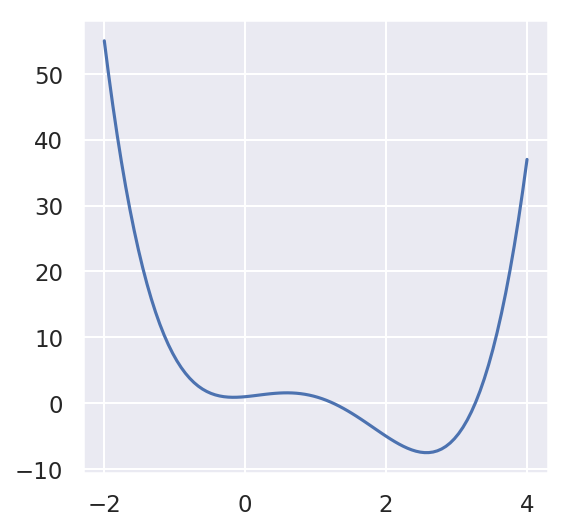

In [53]:
x = np.linspace(-2, 4, 100)
def f_example_1D(x):
    return x**4 - 4*x**3 + 2*x**2 + x + 1

plt.plot(x, f_example_1D(x));

The `minimize` function of sklearn is able to find the minima of arbitrary functions. For example:

In [54]:
from scipy.optimize import minimize
minimize(f_example_1D, x0 = [1.3])

      fun: -7.494017550907326
 hess_inv: array([[0.04601209]])
      jac: array([5.96046448e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([2.57371512])

The code above tells us that the minimizing x is 2.57. We can extract this optimal value by asking for the 'x' from the above dictionary.

In [55]:
best_x = minimize(f_example_1D, x0 = [1.3])['x']
print(best_x)

[2.57371512]


The `x0` we provide to minimize tells the scipy optimizer where to start looking for an optimum. That is, we can think of our algorithm as starting at the red dot and eventually ending up at the minimum at the blue dot.

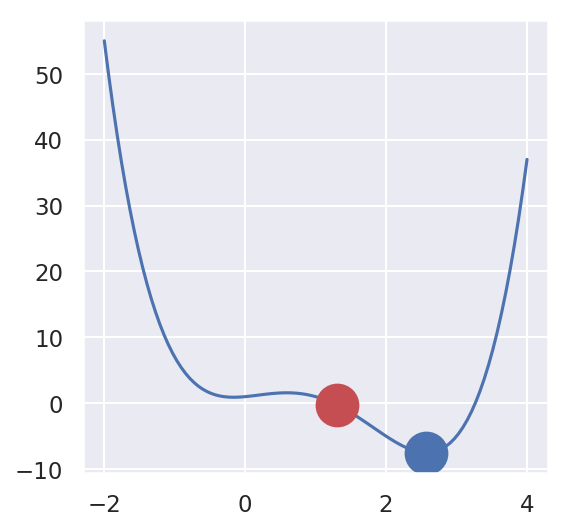

In [56]:
x = np.linspace(-2, 4, 100)
def f_example_1D(x):
    return x**4 - 4*x**3 + 2*x**2 + x + 1

plt.plot(x, f_example_1D(x))
plt.plot(1.3, f_example_1D(1.3), 'ro', markersize = 20)
plt.plot(2.57, f_example_1D(2.57), 'bo', markersize = 20);

**Technical Note:** For general functions, the starting point we select can affect the final outcome. However, the cross entropy loss we'll be using later in this problem has a special property called "convexity" where the starting point we select does not matter. This is beyond the scope of our class.

We can also use `optimize` to minimize multi-dimensional functions. For example, consider the function (1 - x)^2 + 100(y - x^2 + 2)^2, which you can see visualized below or at [this link](https://en.wikipedia.org/wiki/Rosenbrock_function).

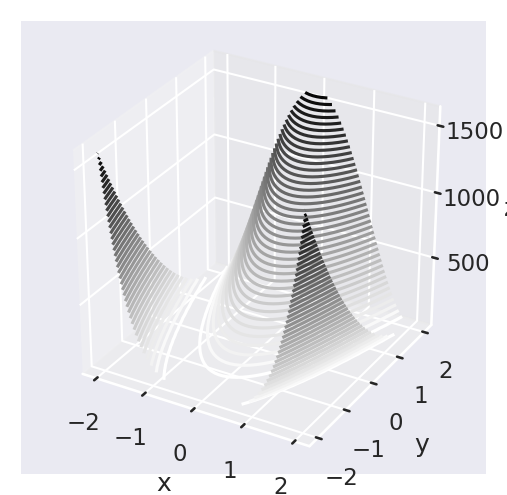

In [57]:
from mpl_toolkits import mplot3d

def f(p):
    x = p[0]
    y = p[1]
    return (1 - x)**2 + 100*(y - x**2 + 2)**2

X = np.linspace(-2, 2, 50)
Y = np.linspace(-2, 2, 50)

p = np.meshgrid(X, Y)
Z = f(p)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

The function is smallest in the large flat light colored region. Let's see what happens when we use scipy optimize on this function. We'll start at x = 0, y = 2, which is at the top of the black hill.

In [58]:
minimize(f, x0 = [0, 2])

      fun: 2.5833878016814077e-11
 hess_inv: array([[0.52025023, 1.04075474],
       [1.04075474, 2.08702067]])
      jac: array([ 1.74194308e-06, -1.47376076e-06])
  message: 'Optimization terminated successfully.'
     nfev: 148
      nit: 25
     njev: 37
   status: 0
  success: True
        x: array([ 0.99999492, -1.00001018])

This time, we see the optimal input is approximately x = 1, y = -1. We can again plot this result as a starting red dot and a final blue dot.

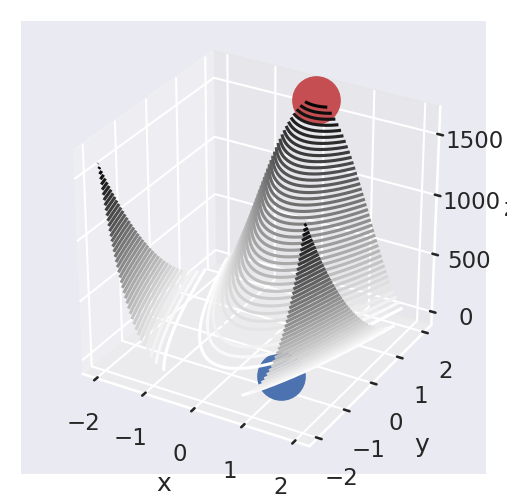

In [59]:
from mpl_toolkits import mplot3d

def f(p):
    x = p[0]
    y = p[1]
    return (1 - x)**2 + 100*(y - x**2 + 2)**2

X = np.linspace(-2, 2, 50)
Y = np.linspace(-2, 2, 50)

p = np.meshgrid(X, Y)
Z = f(p)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.scatter(0, 2, 1600, c='r', s = 500)
ax.scatter(1, -1, 0, c='b', s = 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


Now it's your turn. As an exercise, use scipy's `minimize` to find the minimum of $$x^2 + \frac{y^2}{3} + z^2 + 2x + 5y + 1$$

You should get x = -1, y = -1.5, z = 0.

In [60]:
def func_p2e(p):
    x = p[0]
    y = p[1]
    z = p[2]
    return x**2 + y**2/3 + z**2 + 2*x + 10*y + 1

In [61]:
minimize(func_p2e, [0, 0, 0])

      fun: -74.99999999999964
 hess_inv: array([[ 5.03927575e-01,  1.72607074e-03, -6.70115235e-10],
       [ 1.72607074e-03,  1.50144654e+00, -1.88502196e-09],
       [-6.70115235e-10, -1.88502196e-09,  1.00000000e+00]])
      jac: array([-9.53674316e-07,  0.00000000e+00,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([-1.00000029e+00, -1.49999991e+01,  5.23352967e-09])

#### P2F: Fitting the model (Hard Problem!)

Use `minimize` to find `intercept` and `coef` that minimize training error.

**Hint:** Define a function `total_nba_cross_entropy_training_loss(thetas)` that gives the total cross entropy loss on the training set as a function of the intercept and coefficients. 

**Hint:** Your `p2c_total_cross_entropy_loss` problem will be useful here.

You should approximately intercept = `-2.44` and coefficients = `0.24, -0.09,  0.11`.

In [62]:
def total_nba_cross_entropy_training_loss(thetas):
    return p2c_total_cross_entropy_loss(df_train["WON"], thetas[0], thetas[1:], df_train[p2_features])

In [63]:
minimize(total_nba_cross_entropy_training_loss, x0 = [0, 0, 0, 0])

      fun: 1152.4620232777743
 hess_inv: array([[ 5.10613746e-04, -1.25700104e-04,  7.62280029e-05,
        -4.05955121e-04],
       [-1.25700104e-04,  1.35745263e-04, -6.08630736e-05,
         2.01772486e-05],
       [ 7.62280029e-05, -6.08630736e-05,  2.86335128e-05,
        -2.94661545e-05],
       [-4.05955121e-04,  2.01772486e-05, -2.94661545e-05,
         3.94769375e-04]])
      jac: array([0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 174
      nit: 16
     njev: 29
   status: 0
  success: True
        x: array([-2.43814985,  0.23876402, -0.09202756,  0.11229923])

#### P2F: Using sklearn to Compute Optimal Unregularized Parameters

The intercept and theta we got above are not the same as we used earlier in the problem. For example, your code from P2E found that the coefficient for `FGA` is 0.24, but the example I gave at the beginning of this problem was 0.2.

The reason is that the coefficient we computed at the beginning of this problem was from a regularized model where `C=1e-3`.

Below, create a `LogisticRegression` object with `penalty = 'none'` and fit it to the training set. Then look at the `intercept_` and `coef_` and they should be very close to the intercept and coefficients that you computed in `P2E`.

This is great! It means that what you just did in `P2E` is implement your very own logistic regression model. Good job!

In [64]:
p2f_model = LogisticRegression(penalty = 'none')
p2f_model.fit(df_train[p2_features], df_train["WON"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
p2f_model.intercept_

array([-2.43824694])

In [66]:
p2f_model.coef_

array([[ 0.23876388, -0.09202659,  0.11230134]])

#### P2F: Fitting a Regularized Model

In P2E, you found the $\theta$ values that minimized the total cross entropy loss (TCEL). Or in otherwords, you minimized:

$$\sum_{i = 1}^n -\ln(1-\Delta y_i)$$

The function that sklearn minimizes when regularizing is:

$$\frac{1}{2C} \sum_{i = 2}^d \theta_i^2 + \sum_{i = 1}^n -\ln(1-\Delta y_i)$$

Here we assume the intercept is $\theta_1$, so it is not included in the left sum.

Below, use `minimize` to compute the $\theta$ values that minimize the sum above.

You should get the same $\theta$ we used at the beginning of Problem 2, i.e. intercept = -2.2, and coefficients = 0.2, -0.07, and 0.08.

Once you've done this, you've shown that you've essentially implemented your own `fit` function. Good job! 

In [67]:
def total_nba_cross_entropy_training_loss_plus_regularization(thetas):
    loss = p2c_total_cross_entropy_loss(df_train["WON"], thetas[0], thetas[1:], df_train[p2_features])
    weight = 1 / 2e-3 * np.sum(thetas[1:]**2)
    return loss + weight

In [68]:
minimize(total_nba_cross_entropy_training_loss_plus_regularization, [0, 0, 0, 0])

      fun: 1184.1803355448894
 hess_inv: array([[ 6.20880656e-04, -2.63324399e-04,  1.16110834e-04,
        -1.80957928e-05],
       [-2.63324399e-04,  1.31204336e-04, -5.83460886e-05,
         8.87495782e-06],
       [ 1.16110834e-04, -5.83460886e-05,  2.76699171e-05,
        -2.06517975e-05],
       [-1.80957928e-05,  8.87495782e-06, -2.06517975e-05,
         1.97945588e-04]])
      jac: array([-3.05175781e-05, -9.30786133e-04, -2.70080566e-03, -1.98364258e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 127
      nit: 12
     njev: 21
   status: 2
  success: False
        x: array([-2.20484264,  0.19995038, -0.07420251,  0.08193344])

#### P2H: Bonus Exercise: Building Your Own LogisticRegression Class (hard)

Given what you learned in the previous parts of this problem, implement the `MyLogisticRegression` class below.

In [69]:
class MyLogisticRegression(object):
    def __init__(self, C = 1.0):
        self.C = C
        
    def fit(self, X, y):        
        def log_loss_function_plus_penalty(thetas):
            model = MyLogisticRegression()
            model.intercept_ = thetas[0]
            model.coef_ = thetas[1:]            
            return log_loss(y, model.predict_proba(X), normalize = False) + 1.0 / (2 * self.C) * np.sum(thetas[1:]**2)

        
        
        params = minimize(log_loss_function_plus_penalty, x0 = np.zeros(X.shape[1] + 1))['x']
        self.intercept_ = params[0]
        self.coef_ = params[1:]
        
    def predict_proba(self, X):
        """return 1D array equal to probability that X belongs to class 1"""
        def sigma(x):
            return 1 / (1 + np.exp(-x))
            
        return sigma(np.sum(self.coef_ * X, 1) + self.intercept_)
    
    def predict(self, X):
        """returns 1D array of predictions for X"""
        return (self.predict_proba(X) > 0.5).astype(int)

In [70]:
p2f_model = MyLogisticRegression(C = 1e-3)
p2f_model.fit(df_train[p2_features], df_train["WON"])

The intercept should be -2.2.

In [71]:
p2f_model.intercept_

-2.2048426368444547

Coefficients should be 0.2, -0.07, 0.08/.

In [72]:
p2f_model.coef_

array([ 0.19995038, -0.07420251,  0.08193344])

Predictions should be 0.85, 0.1.

In [73]:
p2f_model.predict_proba([[30, 50, 20],
                         [0, 0, 0]])

array([0.84841353, 0.09931646])

#### Optional Part 3: Intercept Regularization

This part of the homework is less important, but some of you might find it interesitng.

In [74]:
titanic_df = sns.load_dataset("titanic")
titanic_df = titanic_df[["age", "fare", "pclass", "sex", "survived"]].copy()
titanic_df = titanic_df.dropna()
titanic_df['sex'] = titanic_df['sex'].replace("male", 0)
titanic_df['sex'] = titanic_df['sex'].replace("female", 1)
np.random.seed(23)
titanic_train, titanic_test = np.split(titanic_df, [600])

Below, we have trained two models on the titanic dataset.

As described in lecture, `tiny_c_model_fit_intercept_true` has two intercepts, one of which is regularized, and one of which is unregularized.

In [75]:
tiny_c_model_fit_intercept_true = Pipeline([        
    ('scale', StandardScaler()),        
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression(fit_intercept = True, C = 1e-8))
])   
tiny_c_model_fit_intercept_true.fit(titanic_train[["fare", "age", "pclass",  "sex"]], 
                                titanic_train["survived"]);

We see that one of the intercepts is around 10^-12. This is 0th entry of the `coef_`.


In [76]:
tiny_c_model_fit_intercept_true.named_steps["model"].coef_

array([[ 2.25694535e-12,  7.51227164e-07, -2.65119113e-07,
        -1.03238354e-06,  1.56658189e-06,  2.11003830e-06,
         1.57498539e-07, -6.45345674e-07,  2.85642088e-07,
         2.51417259e-08,  8.11665626e-08,  9.48429057e-08,
         3.59262878e-07, -4.70406297e-07,  8.90303584e-07]])

And the other is around -0.377. This is the unregularized intercept.

In [77]:
tiny_c_model_fit_intercept_true.named_steps["model"].intercept_

array([-0.3777663])

By contrast, if we set `fit_intercept = False`, the resulting `intercept_` is zero, and we're left with only the regularized intercept given by the 0th entry of `coef_`.

In [78]:
tiny_c_model_fit_intercept_false = Pipeline([        
    ('scale', StandardScaler()),        
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression(fit_intercept = False, C = 1e-8))
])   
tiny_c_model_fit_intercept_false.fit(titanic_train[["fare", "age", "pclass",  "sex"]], 
                                titanic_train["survived"]);

In [79]:
tiny_c_model_fit_intercept_false.named_steps["model"].coef_

array([[-5.60001095e-07,  7.51233457e-07, -2.65119073e-07,
        -1.03238765e-06,  1.56658614e-06,  1.55006743e-06,
         1.14122444e-07, -3.34537258e-07,  1.91154249e-07,
        -5.34859749e-07,  2.87975816e-07,  1.77232437e-07,
        -2.00738071e-07, -3.98849755e-07,  3.30302647e-07]])

In [80]:
tiny_c_model_fit_intercept_false.named_steps["model"].intercept_

array([0.])

#### P3A: Accuracy

Since the `tiny_c_model_fit_intercept_true` has more freedom to pick a better intercept, you might expect that it should have higher accuracy. Let's test this hypothesis.

Compute the accuracy of our two models.

In [81]:
accuracy_score(titanic_train["survived"], tiny_c_model_fit_intercept_true.predict(titanic_train[["fare", "age", "pclass",  "sex"]]))

0.5933333333333334

In [82]:
accuracy_score(titanic_train["survived"], tiny_c_model_fit_intercept_false.predict(titanic_train[["fare", "age", "pclass",  "sex"]]))

0.7716666666666666

You should see that surprisingly, the model with the `fit_intercept = False` actually has higher accuracy! Over the next few problems, we'll see why.

#### P3B: Cross Entropy 

This time, compute the **total** cross entropy loss for the two models. You should see that `tiny_c_model_fit_intercept_true` is better than `tiny_c_model_fit_intercept_false`, i.e. the log_loss is lower for the model that pick its intercept without worrying about regularization. 

You should get approximately 405 for `tiny_c_model_fit_intercept_true` and 416 for `tiny_c_model_fit_intercept_false`.

Reminder; Make sure to set `normalize = False` when calling `log_loss`. This gives you back the total cross entropy loss instead of the average.

In [83]:
log_loss(titanic_train["survived"], 
         tiny_c_model_fit_intercept_false.predict_proba(titanic_train[["fare", "age", "pclass",  "sex"]]),
         normalize = False)

415.887534194071

In [84]:
log_loss(titanic_train["survived"], 
         tiny_c_model_fit_intercept_true.predict_proba(titanic_train[["fare", "age", "pclass",  "sex"]]),
         normalize = False)

405.3723770626674

Our observations are summarized in the table below.

|                       | accuracy | cross entropy loss |
|-----------------------|----------|--------------------|
| `fit_intercept = True`  | 59%      | 405                |
| `fit_intercept = False` | 77%      | 416                |

Which is better? It depends on how you define better.

The LogisticRegression model defines "better" as lower cross-entropy loss. From that perspective, `fit_intercept = True` is bettre, since cross entropy loss is only 405.

However, as a human using the model, you might care more about accuracy. Or perhaps you care about another measure like "true positive rate". We will discuss other such measurements in a future lecture.

**Note: The REAL problem here is that we have picked a C which is much too small (C = 1e-8). This results in a model that is vastly underfit and cannot perform well on the provided data.** In real world scenarios with reasonable hyperparameter choices, it is uncommon for accuracy and cross entropy loss to be so out of sync.

#### P3C: A Closer Look

You might find it interesting to see the output of our two models:

In [85]:
tiny_c_model_fit_intercept_true.predict_proba(titanic_train[["fare", "age", "pclass",  "sex"]])

array([[0.59333429, 0.40666571],
       [0.59333212, 0.40666788],
       [0.59333359, 0.40666641],
       ...,
       [0.5933332 , 0.4066668 ],
       [0.59333424, 0.40666576],
       [0.59333438, 0.40666562]])

In [86]:
tiny_c_model_fit_intercept_false.predict_proba(titanic_train[["fare", "age", "pclass",  "sex"]])

array([[0.50000055, 0.49999945],
       [0.49999872, 0.50000128],
       [0.49999989, 0.50000011],
       ...,
       [0.49999979, 0.50000021],
       [0.50000085, 0.49999915],
       [0.50000056, 0.49999944]])

What we see is that the `fit_intercept_true` model basically just gives every passenger a 40.6% chance of surviving. This is also the fraction of passengers who survived. That means that the class it predicts for every passenger is 0, i.e. it thinks everyone died. This is why the accuracy is relatively poor, since it gets every single surviving passenger wrong.

By contrast, `fit_intercept_false` gives every passenger an approximately 50% chance of surviving. In this case, the classes for passengers are 0 or 1, resulting in an overall 77% accuracy.